In [26]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
from sklearn.datasets import make_gaussian_quantiles, make_blobs, make_moons
from sklearn.model_selection import train_test_split

In [99]:
class KNN_W(torch.nn.Module):

    def __init__(self, *args, **kwargs):
        super(KNN_W, self).__init__(*args, **kwargs)

    def train(self, X, Y):
        self.X = X
        self.Y = Y

    @staticmethod
    def distance(x1, x2):
        # print(x2-x1)
        return np.linalg.norm(x2-x1, axis=1)

    def predict(self, X, k=2, func=KNN_W.distance):
        # to zi = sum(wi)/sum(W)
        y_end = []
        yp = pd.DataFrame(self.Y)
        for xi in X:
            dp = pd.DataFrame(func(xi, self.X))
            d = pd.concat((dp, yp), axis=1, ignore_index=True, names=[0,1])
            d = pd.DataFrame.sort_values(d, 0, ascending=True).reset_index(drop=True).T
            cl = [0 for i in range(len(set(self.Y)))]
            for i in range(k):
                cl[int(d[i][1])] += 1/d[i][0]
            cl = np.array(cl)/((1/d.T[0]).sum())
            # print(cl)
            y_end.append(sorted(zip(cl, range(self.Y.shape[0])), reverse=True)[0][1])
        return y_end


In [45]:
a = np.arange(0,24).reshape(8,3)
a = np.linalg.norm(a,axis=1)
c = np.arange(8)
b = pd.DataFrame([[a[(i+14)%8], c[(i+4)%8]] for i in range(a.shape[0])])
pd.DataFrame.sort_values(b, 0).reset_index(drop=True).T


,0,1,2,3,4,5,6,7
0,2.236068,7.071068,12.206556,17.378147,22.561028,27.748874,32.939338,38.131352
1,6.000000,7.000000,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000


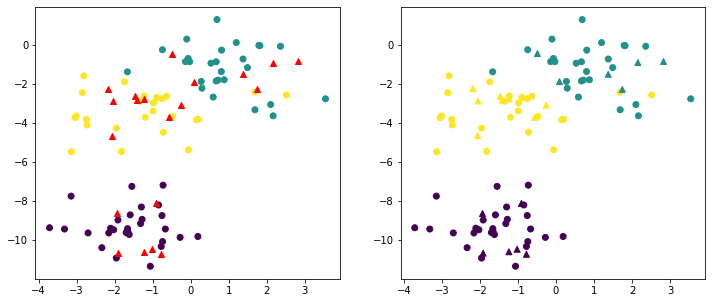

In [100]:
X1, Y1 = make_blobs(random_state=2)
xtr, xte, ytr, yte = train_test_split(X1, Y1, test_size=.2, random_state=2)
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
axes[0].scatter(xtr[:,0], xtr[:,1], c=ytr)
axes[0].scatter(xte[:,0], xte[:,1], c='r', marker='^')
knn = KNN_W()
knn.train(xtr, ytr)
yp = knn.predict(xte, k=16)
axes[1].scatter(xtr[:,0], xtr[:,1], c=ytr)
axes[1].scatter(xte[:,0], xte[:,1], c=yp, marker='^')


In [139]:
X1,Y1 = make_moons(n_samples=200, noise=.05, random_state=2)

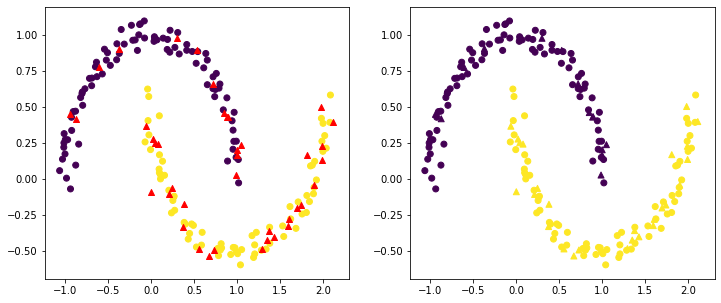

In [140]:
# plt.scatter(x[:,0],x[:,1], c=y)

xtr, xte, ytr, yte = train_test_split(X1, Y1, test_size=.2, random_state=2)
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
axes[0].scatter(xtr[:,0], xtr[:,1], c=ytr)
axes[0].scatter(xte[:,0], xte[:,1], c='r', marker='^')
knn = KNN_W()
knn.train(xtr, ytr)
yp = knn.predict(xte, k=2)
axes[1].scatter(xtr[:,0], xtr[:,1], c=ytr)
axes[1].scatter(xte[:,0], xte[:,1], c=yp, marker='^')

In [142]:
(yp == yte).sum()/(yte.shape[0])*100

100.0

In [98]:
# for xi in x:
from sklearn.metrics.pairwise import euclidean_distances
xs = euclidean_distances(x,x)
xs
# x2 = np.arange(0,200)
# plt.scatter(x2, xs, c=y)

array([[0.        , 1.77895031, 2.8049744 , ..., 1.43558282, 1.44052374,
        1.93064082],
       [1.77895031, 0.        , 1.58403291, ..., 0.34640086, 1.09427783,
        0.74515431],
       [2.8049744 , 1.58403291, 0.        , ..., 1.78136629, 1.38388525,
        0.9420083 ],
       ...,
       [1.43558282, 0.34640086, 1.78136629, ..., 0.        , 0.97366496,
        0.85902362],
       [1.44052374, 1.09427783, 1.38388525, ..., 0.97366496, 0.        ,
        0.66000331],
       [1.93064082, 0.74515431, 0.9420083 , ..., 0.85902362, 0.66000331,
        0.        ]])